Proyecto Aplica



1.   Definición del Problema

En el mundo de las telecomunicaciones existen dos pilares estratégicos fundamentales: atraer clientes y, lo más difícil y costoso, retenerlos. Nuestro caso de estudio se sitúa dentro de una empresa ficticia llamada ‘GUAU’, que representa un escenario muy similar al de compañías reales del rubro.
El problema central es que perder un cliente —lo que se conoce como ‘Churn’— implica una pérdida de ingresos y un costo adicional asociado a reemplazarlo. Por eso, para las empresas es crucial anticiparse a quiénes podrían abandonar el servicio.

Nuestro objetivo es desarrollar un modelo matemático capaz de predecir qué clientes tienen alta probabilidad de cancelar su contrato. Pero no solo eso: también buscamos interpretar estos resultados para generar recomendaciones concretas, es decir, acciones específicas que ayuden a disminuir esa fuga de clientes.
En resumen, el propósito de esta sección es comprender el contexto, definir el problema con claridad y justificar por qué la predicción de churn es un desafío tanto matemático como estratégico.



2.   Análisis exploratorio


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Realizaremos un preprocesamiento para poder mostrar distintos graficos, con respecto a las variables nulas


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


TotalCharges es el total de dinero que el cliente ha pagado históricamente a la compañía hasta la fecha, notamos que posee una pequeña cantidad de elementos vacios y estos los rellenaremos al ser una variable que consideramos predictiva, ya que clientes con TotalCharges altos suelen tener una baja probabilidad de churn, porque normalmente son clientes antiguos que llevan mucho tiempo pagando el servicioy clientes con TotalCharges bajos suelen estar recién contratados, por lo que tienen una mayor probabilidad de churn

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Reemplazar los NaN usando la fórmula aproximada
mask = df['TotalCharges'].isna()
df.loc[mask, 'TotalCharges'] = df.loc[mask, 'tenure'] * df.loc[mask, 'MonthlyCharges']

Aproximación para el rellenado:

TotalCharges = tenure * MonthlyCharges

Esta fórmula es válida porque TotalCharges representa el total de dinero que el cliente ha pagado durante todo el tiempo que lleva en la compañía.
MonthlyCharges es el monto que el cliente paga cada mes por los servicios que tiene contratados y tenure es el número de meses que el cliente lleva en la compañía.

In [ ]:
df = df.drop('customerID', axis=1)

Eliminamos la variable customerID ya que no reprentan datos significativos

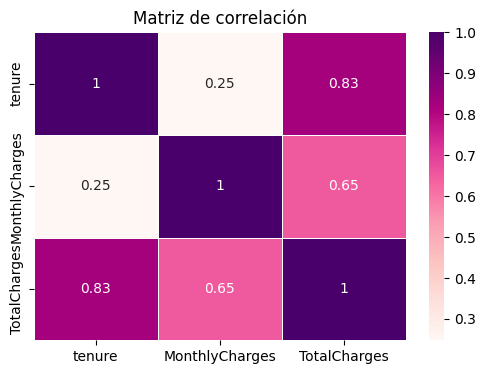

In [ ]:
df['Churn_flag'] = df['Churn'].map({'Yes': 1, 'No': 0})
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="RdPu", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

La matriz de correlación muestra la relación entre las variables numéricas tenure, MonthlyCharges y TotalCharges. La correlación más fuerte es entre tenure y TotalCharges, con un valor cercano a 0.83. Esto es esperable porque mientras más tiempo lleva un cliente en la empresa, mayor es el monto total que ha pagado. También existe una correlación moderada entre MonthlyCharges y TotalCharges (alrededor de 0.65), lo cual indica que los clientes con planes mensuales más costosos tienden a acumular mayores cargos totales, aunque esta relación no es tan fuerte porque el total depende principalmente del tiempo en la empresa. La correlación entre tenure y MonthlyCharges es baja (aproximadamente 0.25), lo que muestra que la antigüedad de un cliente no está relacionada con cuánto paga mensualmente, ya que existen planes caros y baratos para clientes tanto nuevos como antiguos.

La variable Churn_flag no se muestra en el gráfico porque no fue incluida correctamente dentro de la matriz de correlación, de modo que solo aparecen las tres variables numéricas mencionadas.


3.   Visualización descriptiva



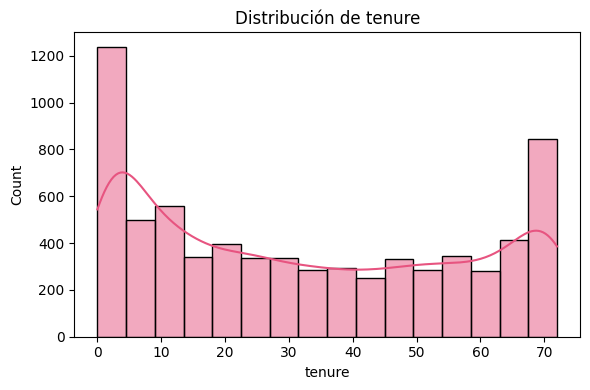

<Figure size 640x480 with 0 Axes>

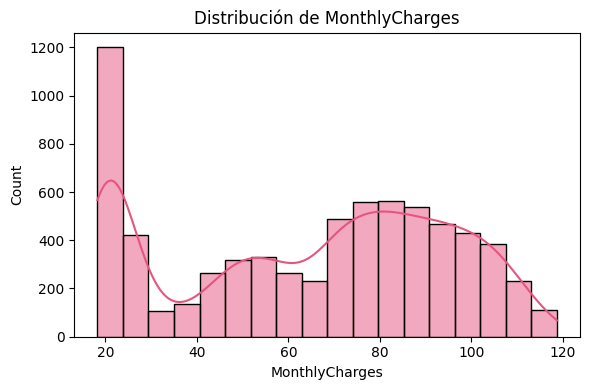

<Figure size 640x480 with 0 Axes>

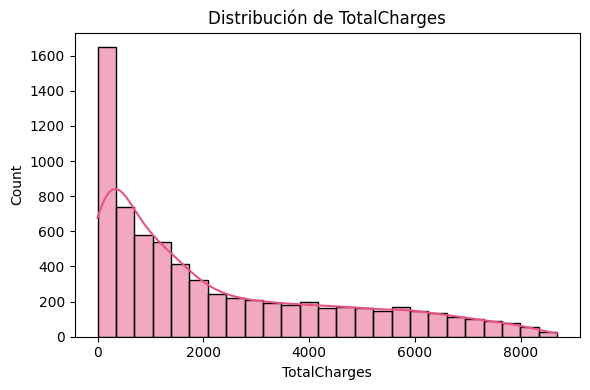

<Figure size 640x480 with 0 Axes>

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color="#e75480")
    plt.title(f"Distribución de {col}")
    plt.tight_layout()
    plt.show()
    plt.clf()


La distribución de tenure muestra que hay muchos clientes muy nuevos (0 a 5 meses) y muchos clientes muy antiguos (alrededor de 70 meses). Esto genera una forma de U. Esto indica que la empresa tiene problemas para retener a los clientes nuevos, pero que quienes permanecen más tiempo tienden a quedarse por años.

La distribución de MonthlyCharges muestra dos grupos claros: uno de clientes con planes baratos (alrededor de 20 a 30 dólares) y otro grupo con planes más caros (70 a 90 dólares). Esto sugiere segmentación de productos. Los clientes con planes caros tienden a tener mayor riesgo de churn.

La distribución de TotalCharges está muy sesgada hacia la izquierda, lo que indica que muchos clientes han pagado poco, es decir, son nuevos. A medida que el total pagado aumenta, hay menos clientes, lo que es esperable. Los clientes que han pagado más suelen ser antiguos y tienen menor churn.

En conjunto, los tres gráficos muestran que la empresa tiene muchos clientes nuevos, lo cual aumenta el churn, mientras que los clientes antiguos presentan mayor estabilidad. También se observan dos niveles claros de precios mensuales, lo que refleja distintos segmentos de clientes.

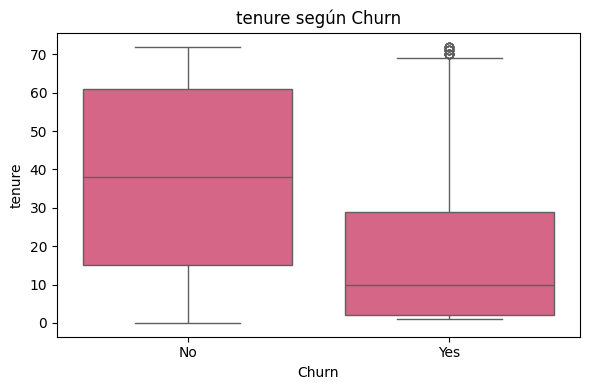

<Figure size 640x480 with 0 Axes>

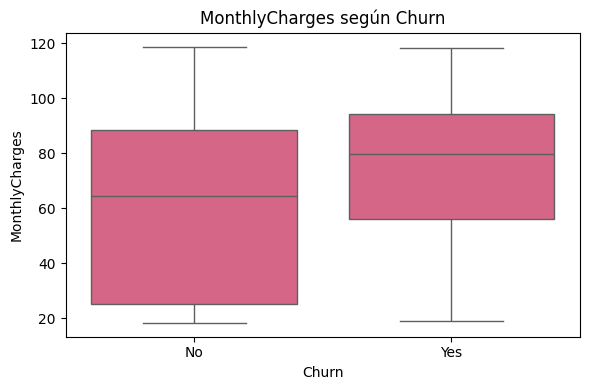

<Figure size 640x480 with 0 Axes>

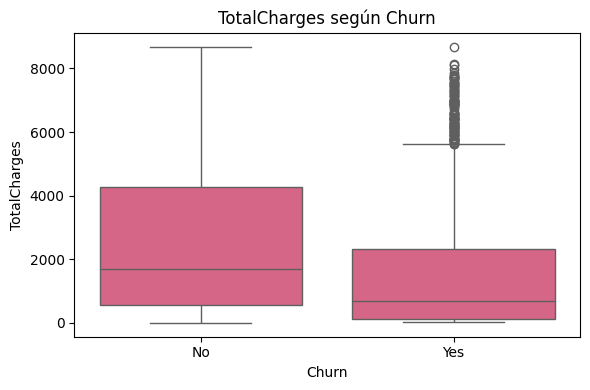

<Figure size 640x480 with 0 Axes>

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Churn', y=col, color="#e75480")
    plt.title(f"{col} según Churn")
    plt.tight_layout()
    plt.show()
    plt.clf()

El análisis de los boxplots muestra diferencias claras entre los clientes que hacen churn y los que no. En la variable tenure se observa que los clientes que no hacen churn tienen una antigüedad mucho mayor en la compañía, con una mediana cercana a los 40 meses. Por el contrario, los clientes que churnean tienen un tenure muy bajo, con una mediana alrededor de 8 meses. Esto indica que los clientes nuevos son los que más se van, mientras que los clientes que llevan más tiempo tienden a permanecer.

En la variable MonthlyCharges se observa que los clientes que churnean pagan planes más costosos. La mediana del grupo Yes está cerca de 80 dólares, mientras que la del grupo No está alrededor de 65 dólares. Esto sugiere que los planes de mayor precio, especialmente los asociados a fibra óptica o servicios adicionales, presentan una mayor probabilidad de churn.

En la variable TotalCharges, los clientes que no churnean muestran un total pagado significativamente mayor, con medianas en torno a los 2000 dólares e incluso valores que superan los 8000. Los clientes que churnean presentan valores mucho menores, con una mediana cercana a 500 dólares. Esto confirma que los clientes que abandonan suelen ser nuevos, ya que han pagado poco tiempo en la empresa.

En conjunto, los tres gráficos indican que el churn ocurre principalmente en clientes nuevos que pagan planes más caros. Esto define un perfil claro de riesgo: clientes con poco tiempo en la compañía y altos costos mensuales.

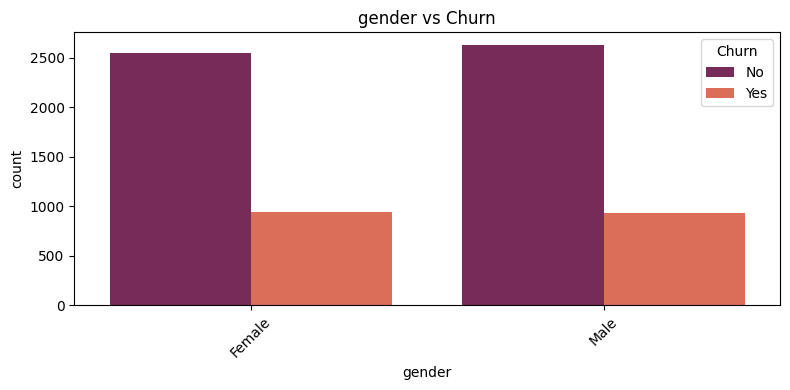

<Figure size 640x480 with 0 Axes>

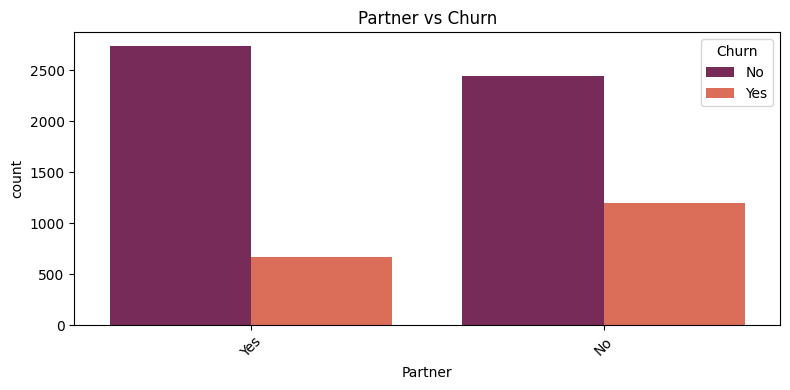

<Figure size 640x480 with 0 Axes>

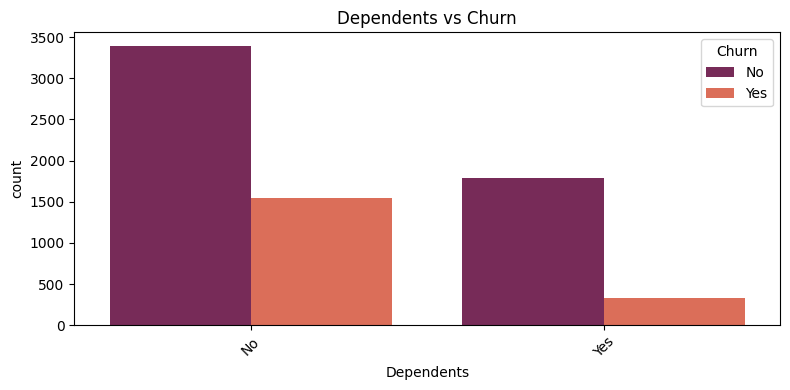

<Figure size 640x480 with 0 Axes>

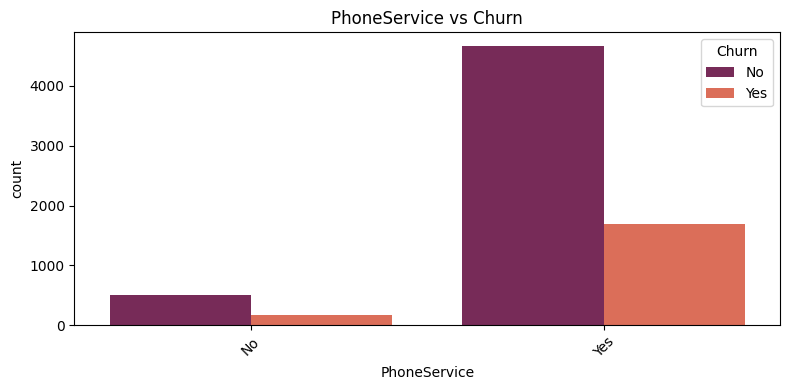

<Figure size 640x480 with 0 Axes>

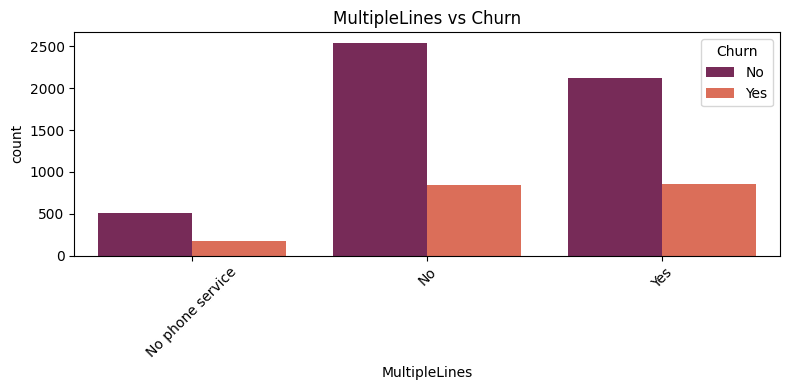

<Figure size 640x480 with 0 Axes>

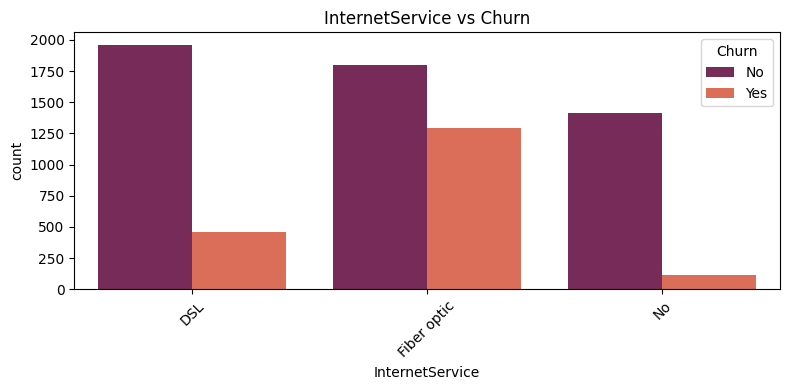

<Figure size 640x480 with 0 Axes>

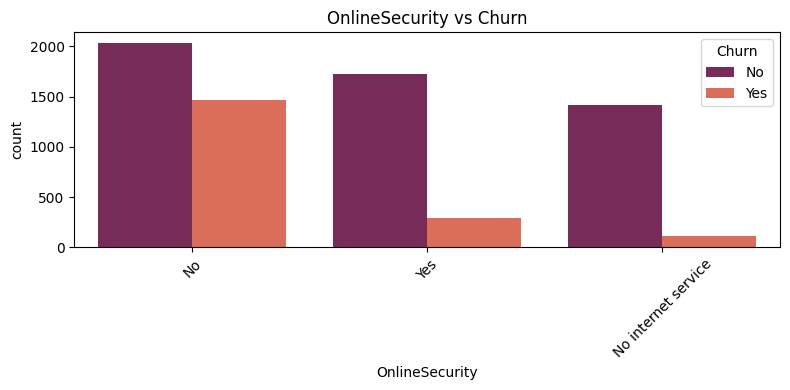

<Figure size 640x480 with 0 Axes>

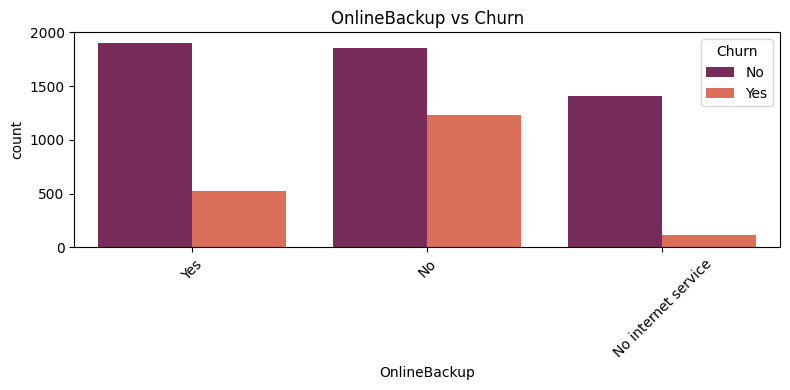

<Figure size 640x480 with 0 Axes>

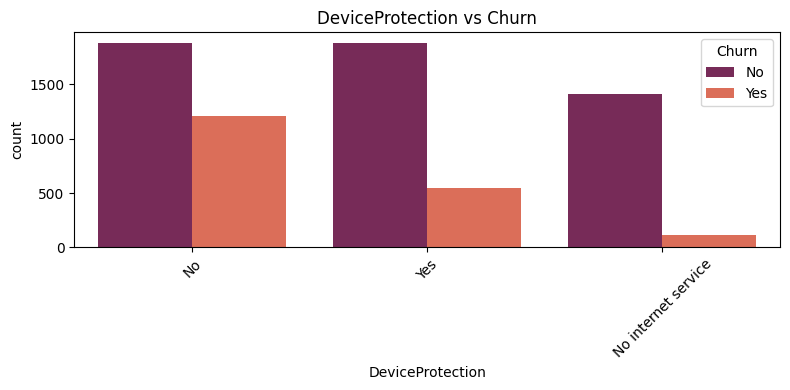

<Figure size 640x480 with 0 Axes>

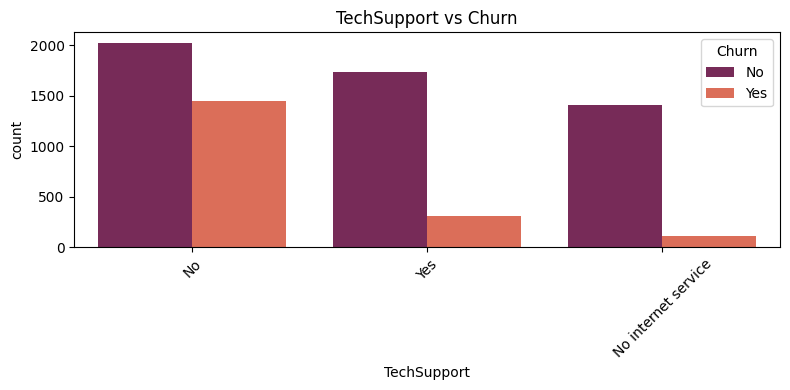

<Figure size 640x480 with 0 Axes>

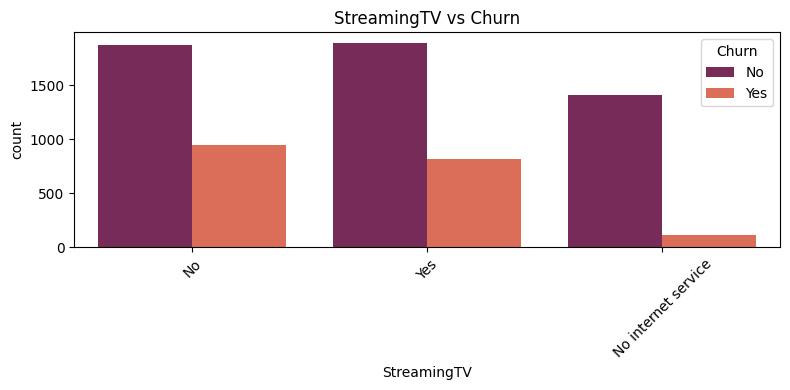

<Figure size 640x480 with 0 Axes>

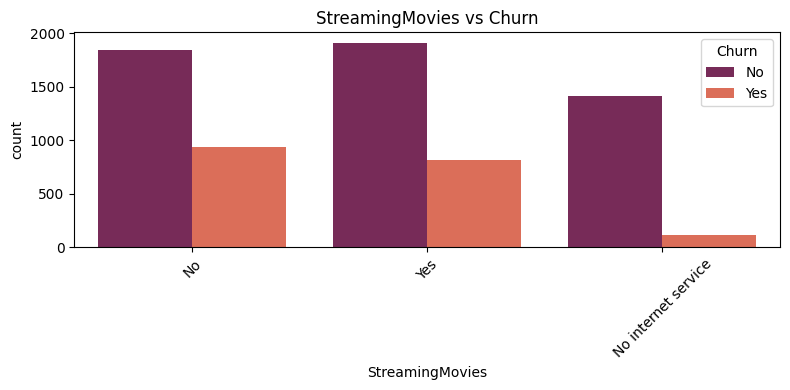

<Figure size 640x480 with 0 Axes>

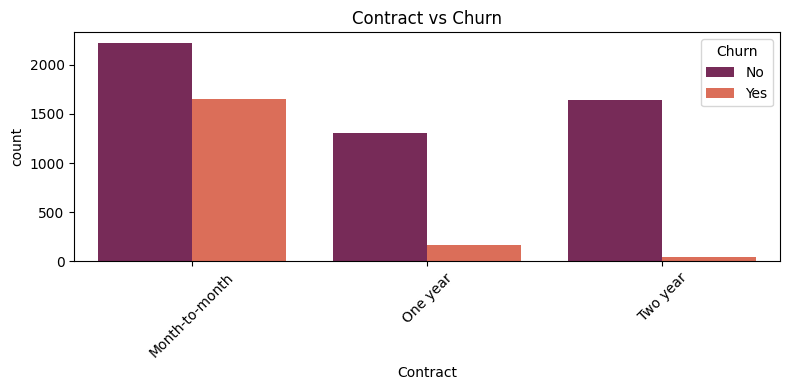

<Figure size 640x480 with 0 Axes>

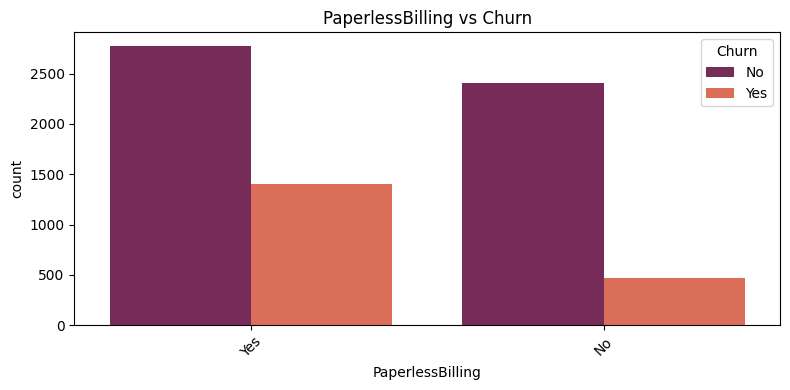

<Figure size 640x480 with 0 Axes>

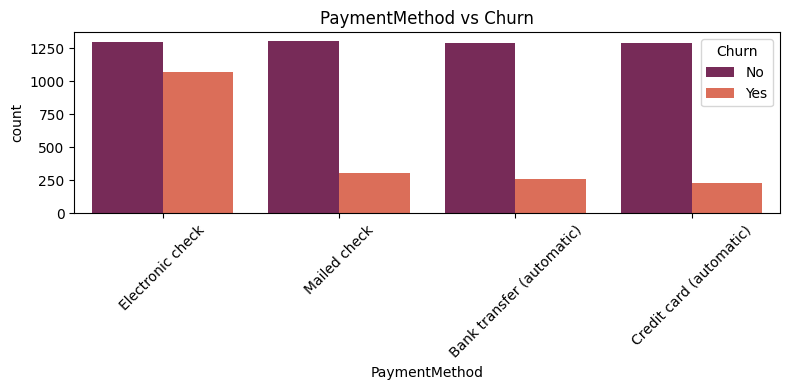

<Figure size 640x480 with 0 Axes>

In [ ]:
cat_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Churn']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Churn', palette="rocket")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.clf()

En la variable gender no se observa diferencia importante entre hombres y mujeres. Ambos grupos tienen prácticamente la misma proporción de churn, por lo que el género no influye significativamente en la probabilidad de abandono.

En la variable Partner se ve que los clientes sin pareja presentan un churn mayor, mientras que los clientes con pareja tienen una probabilidad más baja de abandonar. Esto sugiere que los clientes con pareja tienden a ser más estables.

En Dependents ocurre algo similar: los clientes sin dependientes hacen churn mucho más que aquellos que sí tienen dependientes. Tener dependientes está asociado a menor churn, probablemente porque estos clientes tienden a ser más estables y menos propensos a cambiar de proveedor.

En PhoneService, la mayoría de los clientes tienen este servicio. La proporción de churn entre quienes lo tienen no es especialmente alta, por lo que esta variable no parece ser un factor determinante. Entre quienes no tienen PhoneService, el número total de clientes es bajo, así que no aporta tanta información.

En MultipleLines se observa que los clientes con una sola línea o con múltiples líneas tienen churn relativamente alto. Tener múltiples líneas no reduce el churn, e incluso podría asociarse a pagos más altos, lo que aumenta la probabilidad de abandono.

En InternetService se observa una diferencia clara. Los clientes con DSL tienen un churn más bajo. Los clientes con fibra óptica tienen un churn mucho más alto. Los clientes sin servicio de internet casi no presentan churn. Esto indica que quienes contratan fibra óptica, que generalmente implica un costo mensual más alto, tienden a abandonar más.

En OnlineSecurity se aprecia que los clientes sin este servicio tienen un churn elevado, mientras que los que sí lo tienen tienen un churn mucho más bajo. Esto indica que los servicios adicionales de seguridad ayudan a retener clientes.

En OnlineBackup ocurre lo mismo: quienes no cuentan con este servicio presentan mayor churn que quienes sí lo tienen.

En DeviceProtection también se observa la misma tendencia. La ausencia de este servicio se asocia con mayor churn, mientras que tenerlo reduce la probabilidad de abandono.

Los clientes que no cuentan con TechSupport presentan un churn alto, mientras que quienes sí tienen soporte técnico muestran un churn mucho menor. Esto indica que el soporte técnico es un factor importante para retener clientes.

En los servicios de StreamingTV y StreamingMovies no se observan diferencias relevantes entre quienes hacen churn y quienes no, por lo que estos servicios no parecen influir significativamente en el comportamiento de abandono.

El tipo de contrato es una de las variables más determinantes. Los clientes con contrato month-to-month tienen un churn muy elevado, mientras que los contratos de un año y especialmente los de dos años presentan un churn muy bajo. Esto muestra que los compromisos a largo plazo reducen fuertemente la probabilidad de abandono.

En PaperlessBilling se observa que los clientes que usan facturación electrónica tienen un churn más alto, mientras que quienes utilizan métodos tradicionales presentan mucho menos churn.

El método de pago también es clave: el churn es muy alto en los clientes que pagan mediante Electronic Check, mientras que es considerablemente más bajo en quienes utilizan Mailed Check, transferencia bancaria automática o tarjeta de crédito automática.

ANÁLISIS DETALLADO DE TENURE Y CONTRATO

Los contratos son claves.

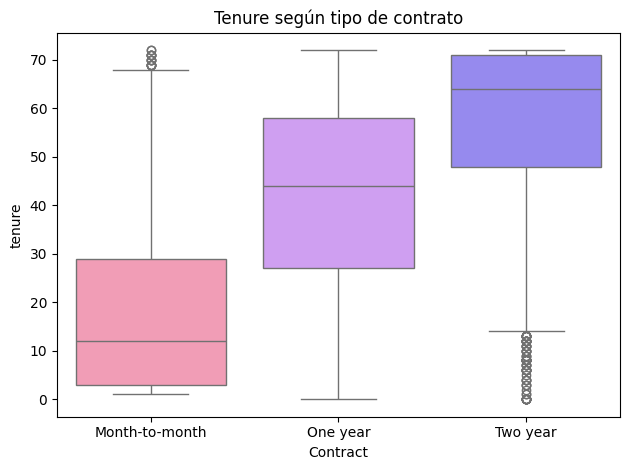

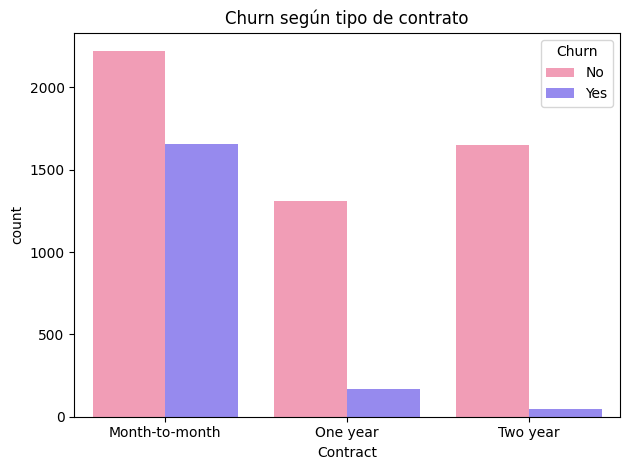

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.boxplot(
    data=df,
    x='Contract',
    y='tenure',
    hue='Contract',
    palette=["#ff8fb1", "#d291ff", "#8a79ff"],
    dodge=False,
    legend=False
)
plt.title("Tenure según tipo de contrato")
plt.tight_layout()
plt.show()
plt.clf()

sns.countplot(
    data=df,
    x='Contract',
    hue='Churn',
    palette={'No': "#ff8fb1", 'Yes': "#8a79ff"}
)
plt.title("Churn según tipo de contrato")
plt.tight_layout()
plt.show()
plt.clf()

Los gráficos muestran que el tipo de contrato tiene una relación muy fuerte con el churn. Los clientes con contrato month-to-month presentan un tenure bajo y son los que más abandonan el servicio. Esto se debe a que no tienen un compromiso a largo plazo y pueden cancelar fácilmente. En cambio, los clientes con contratos de un año muestran un tenure significativamente mayor y una tasa de churn mucho más baja. Finalmente, los clientes con contratos de dos años son los más estables: tienen el mayor tenure y casi no presentan churn. En resumen, mientras más largo es el contrato, mayor es la permanencia del cliente y menor es la probabilidad de abandono, lo que convierte al tipo de contrato en uno de los factores más importantes para predecir churn.

ANÁLISIS DETALLADO DE SERVICIOS DE INTERNET

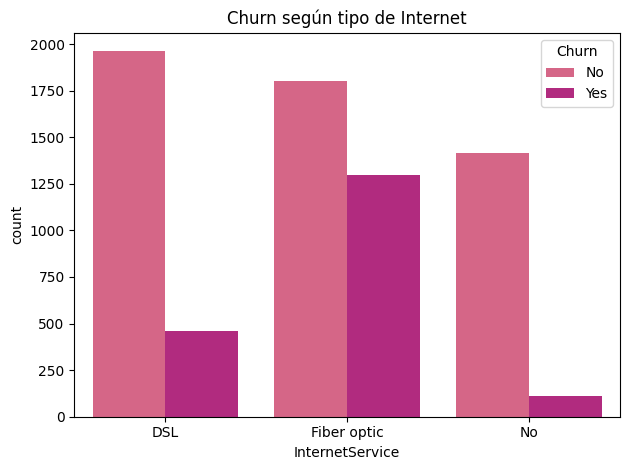

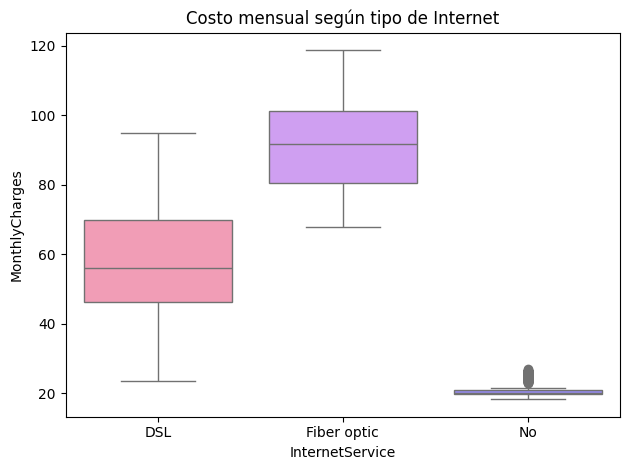

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(
    data=df,
    x='InternetService',
    hue='Churn',
    palette={'No': "#e75480", 'Yes': "#c71585"}
)
plt.title("Churn según tipo de Internet")
plt.tight_layout()
plt.show()
plt.clf()

sns.boxplot(
    data=df,
    x='InternetService',
    y='MonthlyCharges',
    hue='InternetService',
    palette=["#ff8fb1", "#d291ff", "#8a79ff"],
    dodge=False,
    legend=False
)
plt.title("Costo mensual según tipo de Internet")
plt.tight_layout()
plt.show()
plt.clf()

Los gráficos muestran que el tipo de servicio de Internet tiene una relación clara con el churn. Los clientes con Fiber optic presentan la mayor cantidad de abandonos, mientras que los que usan DSL tienen un churn considerablemente menor. Los clientes sin servicio de internet prácticamente no abandonan. El segundo gráfico ayuda a entender este comportamiento: Fiber optic es el servicio con el costo mensual más alto, con una mediana cercana a los 90–95 dólares, mientras que DSL es más económico y los clientes sin internet pagan valores muy bajos. Esto sugiere que el costo elevado de la fibra óptica aumenta la probabilidad de churn, mientras que los servicios más económicos retienen mejor a los clientes.

ANÁLISIS DETALLADO DE MÉTODO DE PAGO

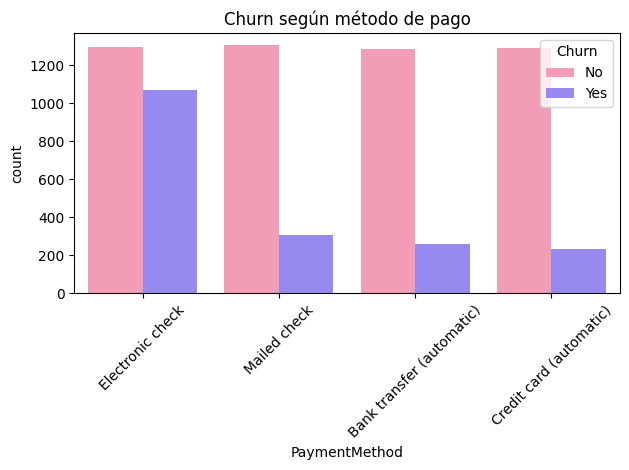

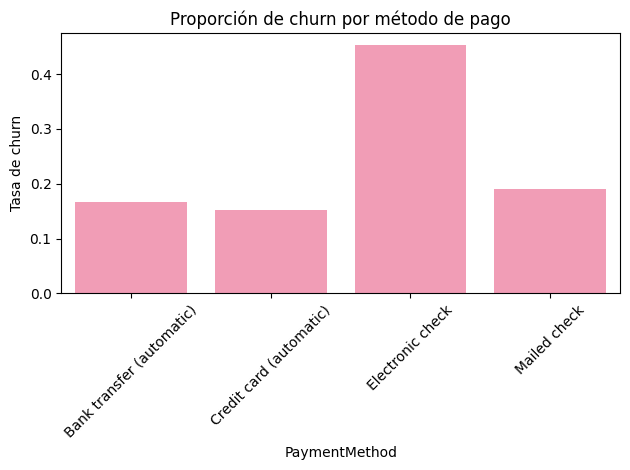

<Figure size 640x480 with 0 Axes>

In [ ]:
palette_churn = {'No': "#ff8fb1", 'Yes': "#8a79ff"}

sns.countplot(
    data=df,
    x='PaymentMethod',
    hue='Churn',
    palette=palette_churn
)
plt.title("Churn según método de pago")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

df_temp = df.copy()
df_temp['Churn'] = df_temp['Churn'].map({'Yes': 1, 'No': 0})

payment_rates = df_temp.groupby("PaymentMethod")["Churn"].mean().reset_index()

sns.barplot(
    data=payment_rates,
    x="PaymentMethod",
    y="Churn",
    color="#ff8fb1"
)
plt.title("Proporción de churn por método de pago")
plt.xticks(rotation=45)
plt.ylabel("Tasa de churn")
plt.tight_layout()
plt.show()
plt.clf()

Los gráficos muestran que el método de pago tiene una relación directa con el churn. El método más riesgoso es Electronic Check, donde la proporción de clientes que abandonan es significativamente mayor que en los demás métodos. Esto sugiere que quienes pagan de forma manual o poco automatizada tienen una mayor probabilidad de dejar el servicio. En contraste, los métodos automáticos como Bank Transfer y Credit Card presentan las tasas de churn más bajas, lo que indica que los clientes con pagos automatizados tienden a ser más estables y fieles. El pago mediante Mailed Check también muestra un churn relativamente bajo, aunque no tan reducido como en los métodos automáticos. En general, el método de pago es un fuerte predictor del comportamiento de churn, destacando que los clientes que utilizan Electronic Check constituyen un segmento crítico para la retención.

ANÁLISIS DETALLADO DE SERVICIOS DE PROTECCIÓN

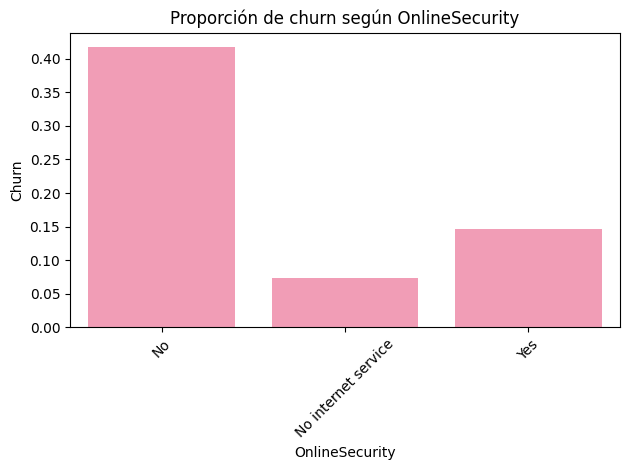

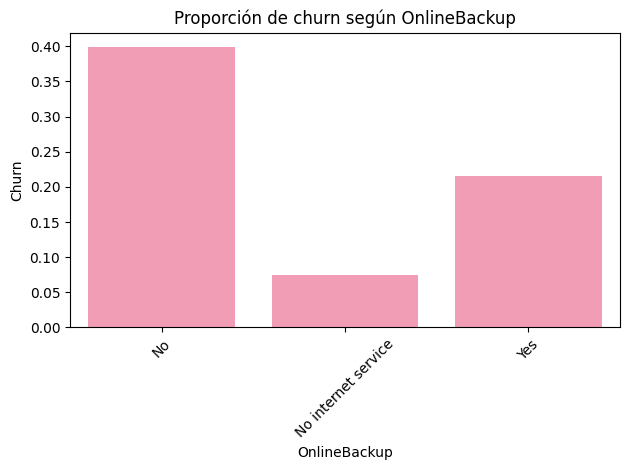

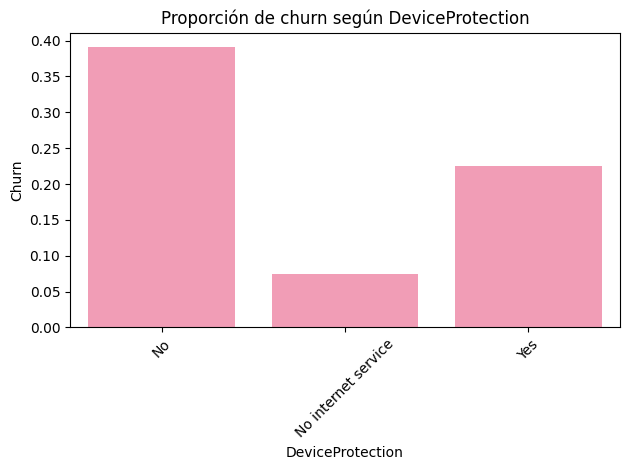

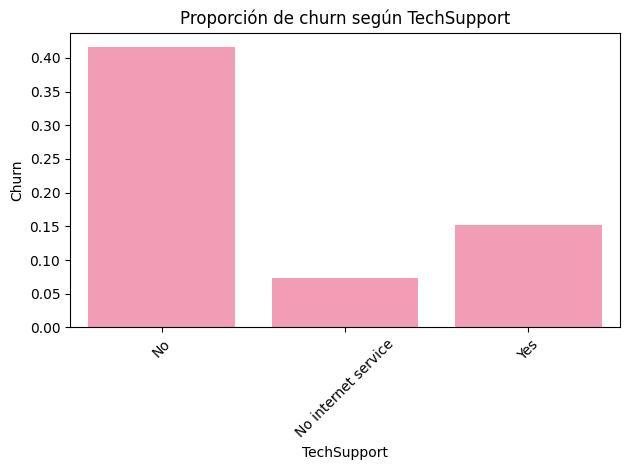

<Figure size 640x480 with 0 Axes>

In [ ]:
services = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]

for s in services:
    df_temp = df.copy()
    df_temp['Churn'] = df_temp['Churn'].map({'Yes': 1, 'No': 0})
    rates = df_temp.groupby(s)["Churn"].mean().reset_index()
    sns.barplot(data=rates, x=s, y="Churn", color="#ff8fb1")
    plt.title(f"Proporción de churn según {s}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.clf()

Los gráficos permiten observar la proporción de churn según cuatro servicios adicionales ofrecidos por la compañía: OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport. En todos los casos se identifica un patrón consistente que permite extraer conclusiones relevantes.

En primer lugar, los clientes que no cuentan con estos servicios presentan las tasas de churn más elevadas, cercanas al 40%. Esto indica que la ausencia de servicios complementarios se asocia fuertemente con una mayor probabilidad de abandono. Estos usuarios, al no contratar funciones de protección, respaldo o soporte técnico, parecen estar menos vinculados a la empresa y más propensos a cambiarse de proveedor.

En contraste, los clientes clasificados como “No internet service” exhiben tasas de churn considerablemente bajas, alrededor del 7–8%. Este grupo corresponde a personas que no utilizan servicios de internet, lo cual los excluye de la posibilidad de contratar los servicios adicionales evaluados. Su baja tasa de abandono sugiere que tienen un vínculo más estable con la compañía y son menos sensibles a los factores que impulsan el churn dentro del segmento de usuarios de internet.

Por otra parte, los clientes que sí cuentan con los servicios adicionales presentan tasas de churn intermedias, aproximadamente entre 14% y 22%. Aunque siguen existiendo abandonos en este grupo, la proporción es significativamente menor que en quienes no contratan estos servicios. Esto sugiere que tecnologías como seguridad en línea, respaldo remoto, protección de dispositivos o soporte técnico contribuyen a aumentar la retención de usuarios, actuando como elementos que fortalecen la relación del cliente con la empresa.

4. Preprocesamiento



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

if 'Churn_flag' in df.columns:
    df = df.drop('Churn_flag', axis=1)
    print("Columna 'Churn_flag' eliminada para evitar Data Leakage.")

# 2. Separación X - y
X = df.drop('Churn', axis=1)
y = df['Churn']

# 3. Separación train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Detectar TODAS las columnas categóricas automáticamente
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

# 5. One-Hot Encoding
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Alinear columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)

# 6. Normalizar
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 7. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


Columna 'Churn_flag' eliminada para evitar Data Leakage.


### Visualización del Balance de Clases antes y después de SMOTE

Este gráfico ayuda a ilustrar la importancia de SMOTE para manejar el desequilibrio de clases.

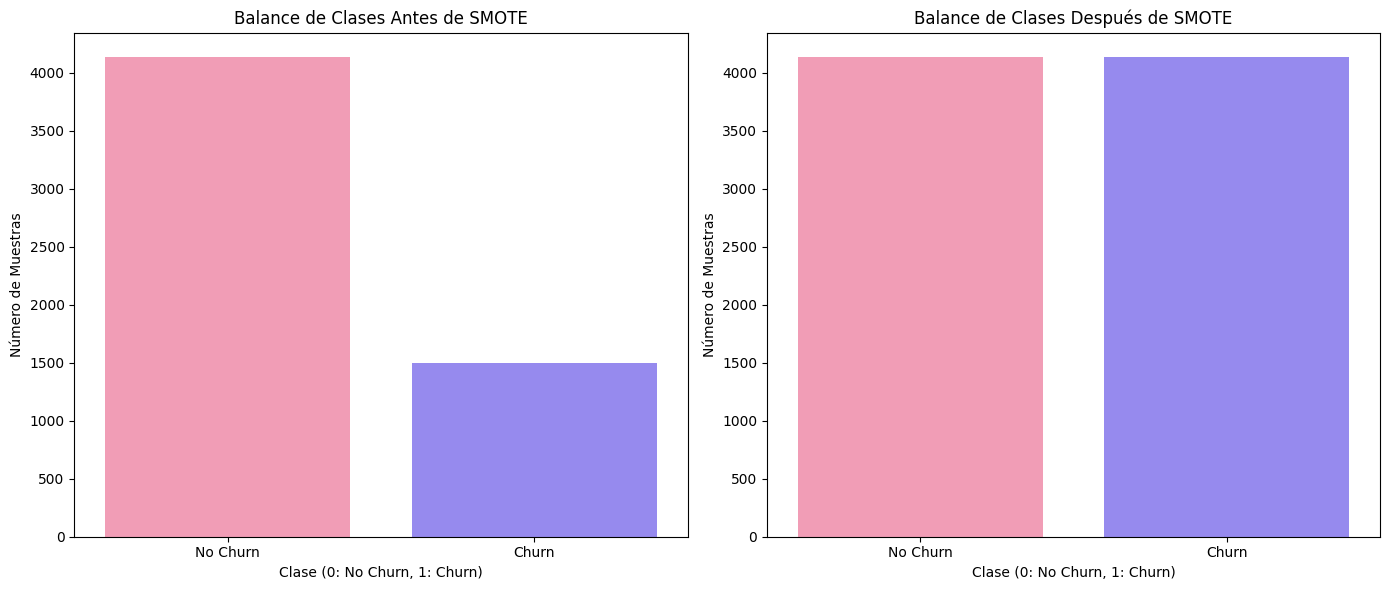

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
palette_churn = {0: "#ff8fb1", 1: "#8a79ff"}
# Obtener el recuento de clases antes de SMOTE
class_counts_before = y_train.value_counts()

# Obtener el recuento de clases después de SMOTE
class_counts_after = y_train_res.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico antes de SMOTE
sns.barplot(x=class_counts_before.index, y=class_counts_before.values, ax=axes[0], palette=palette_churn, hue=class_counts_before.index, legend=False)
axes[0].set_title('Balance de Clases Antes de SMOTE')
axes[0].set_xlabel('Clase (0: No Churn, 1: Churn)')
axes[0].set_ylabel('Número de Muestras')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Churn', 'Churn'])

# Gráfico después de SMOTE
sns.barplot(x=class_counts_after.index, y=class_counts_after.values, ax=axes[1], palette=palette_churn, hue=class_counts_after.index, legend=False)
axes[1].set_title('Balance de Clases Después de SMOTE')
axes[1].set_xlabel('Clase (0: No Churn, 1: Churn)')
axes[1].set_ylabel('Número de Muestras')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder # Added OneHotEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.pipeline import Pipeline # Added Pipeline
from sklearn.compose import ColumnTransformer # Added ColumnTransformer

# --- 2. LIMPIEZA DE DATOS ---
if df is not None:
    # Limpiar TotalCharges
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'] = df['TotalCharges'].fillna(0)

    # Limpiar y mapear la variable objetivo 'Churn'
    # Solo mapea si la columna es de tipo 'object' (texto)
    if pd.api.types.is_object_dtype(df['Churn']):
        df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
        print("Columna 'Churn' mapeada de Yes/No a 1/0.")

    # Eliminar filas donde 'Churn' sea NaN
    df = df.dropna(subset=['Churn'])
    df['Churn'] = df['Churn'].astype(int)

    # Eliminar ID
    df = df.drop('customerID', axis=1, errors='ignore')
    print(f"Datos limpios. Forma: {df.shape}")

    # --- 3. DEFINICIÓN DE X E Y ---
    X = df.drop('Churn', axis=1)
    y = df['Churn']

    # --- 4. DEFINICIÓN DE COLUMNAS ---
    numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
    categorical_features = [col for col in X.columns if col not in numeric_features]

    # --- 5. DIVISIÓN DE DATOS ---
    # (Este 'if' previene el error si df sigue vacío por alguna razón)
    if not X.empty:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        print("Datos divididos en Train y Test.")

        # --- 6. PIPELINE DE PREPROCESAMIENTO ---
        numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
        categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        # --- 7. APLICAR PREPROCESAMIENTO ---
        X_train_processed = preprocessor.fit_transform(X_train)
        X_test_processed = preprocessor.transform(X_test)

        # --- 8. APLICAR SMOTE (Solo a Train) ---
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

Columna 'Churn' mapeada de Yes/No a 1/0.
Datos limpios. Forma: (7043, 20)
Datos divididos en Train y Test.


5. Selección y comparación de modelos




In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_fscore_support

model_comparison = {}

In [ ]:
# 1. Definir Modelos y Grillas
lr = LogisticRegression(max_iter=1000, solver='liblinear')
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_grid_lr = {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [3, 6]}

models_to_run = {
    'LogisticRegression': (lr, param_grid_lr),
    'RandomForest': (rf, param_grid_rf),
    'XGBoost': (xgb, param_grid_xgb)
}

# 2. Bucle de GridSearchCV
for name, (model, params) in models_to_run.items():
    print(f"\n--- Ajustando {name} ---")

    grid_search = GridSearchCV(estimator=model,
                               param_grid=params,
                               cv=5,
                               scoring='roc_auc',
                               n_jobs=-1,
                               verbose=1)

    grid_search.fit(X_train_res, y_train_res)

    best_model = grid_search.best_estimator_
    print(f"Mejores params: {grid_search.best_params_}")

    # 3. Evaluar y guardar métricas
    # Use X_test_processed for predictions
    y_pred = best_model.predict(X_test_processed)
    y_pred_prob = best_model.predict_proba(X_test_processed)[:, 1]

    roc_auc = roc_auc_score(y_test, y_pred_prob)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    model_comparison[name] = {
        'ROC-AUC': roc_auc,
        'Precision (Churn)': precision,
        'Recall (Churn)': recall,
        'F1-Score (Churn)': f1
    }
    print(f"Resultados de {name} guardados.")


--- Ajustando LogisticRegression ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores params: {'C': 10.0, 'penalty': 'l1'}
Resultados de LogisticRegression guardados.

--- Ajustando RandomForest ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores params: {'max_depth': 20, 'n_estimators': 200}
Resultados de RandomForest guardados.

--- Ajustando XGBoost ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:26:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores params: {'max_depth': 3, 'n_estimators': 200}
Resultados de XGBoost guardados.


In [ ]:
print("\n--- Entrenando Red Neuronal (PyTorch) ---")

# 1. Preparar Tensores de PyTorch
X_train_np = X_train_res.astype(np.float32)

y_train_np = y_train_res.astype(np.float32)

X_test_np = X_test_processed.astype(np.float32)

y_test_np = y_test.values.astype(np.float32)

X_train_tensor = torch.tensor(X_train_np)
y_train_tensor = torch.tensor(y_train_np).view(-1, 1)
X_test_tensor = torch.tensor(X_test_np)
y_test_tensor = torch.tensor(y_test_np).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

input_features = X_train_tensor.shape[1]

# 2. Definir la Arquitectura
class ChurnClassifier(nn.Module):
    def __init__(self, input_features):
        super(ChurnClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_features, 32),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.network(x)

model_pytorch = ChurnClassifier(input_features)

# 3. Definir Pérdida y Optimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)

# 4. Bucle de Entrenamiento
epochs = 50
for epoch in range(epochs):
    model_pytorch.train()
    for batch_X, batch_y in train_loader:
        y_pred = model_pytorch(batch_X)
        loss = criterion(y_pred, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print("Entrenamiento de PyTorch completado.")

# 5. Evaluación de PyTorch
model_pytorch.eval()
with torch.no_grad():
    y_pred_prob_tensor = model_pytorch(X_test_tensor)

    y_pred_prob_nn = y_pred_prob_tensor.numpy()
    y_test_numpy = y_test_tensor.numpy()
    y_pred_class_nn = (y_pred_prob_nn > 0.5).astype(int)

    roc_auc_nn = roc_auc_score(y_test_numpy, y_pred_prob_nn)
    precision_nn, recall_nn, f1_nn, _ = precision_recall_fscore_support(y_test_numpy, y_pred_class_nn, average='binary')

    model_comparison['PyTorch NN'] = {
        'ROC-AUC': roc_auc_nn,
        'Precision (Churn)': precision_nn,
        'Recall (Churn)': recall_nn,
        'F1-Score (Churn)': f1_nn
    }
    print("Resultados de PyTorch guardados.")


--- Entrenando Red Neuronal (PyTorch) ---
Entrenamiento de PyTorch completado.
Resultados de PyTorch guardados.


In [ ]:
print("\n\n--- TABLA DE COMPARACIÓN FINAL (Sección 6) ---")

comparison_df = pd.DataFrame.from_dict(model_comparison, orient='index')
comparison_df = comparison_df.sort_values(by='ROC-AUC', ascending=False)

try:
    display(comparison_df)
except NameError:
    print(comparison_df)



--- TABLA DE COMPARACIÓN FINAL (Sección 6) ---


,ROC-AUC,Precision (Churn),Recall (Churn),F1-Score (Churn)
LogisticRegression,0.840810,0.505942,0.796791,0.618899
PyTorch NN,0.833579,0.522936,0.762032,0.620239
XGBoost,0.829643,0.580402,0.617647,0.598446
RandomForest,0.827181,0.581218,0.612299,0.596354


6. Evaluación de modelos


<Figure size 600x600 with 0 Axes>

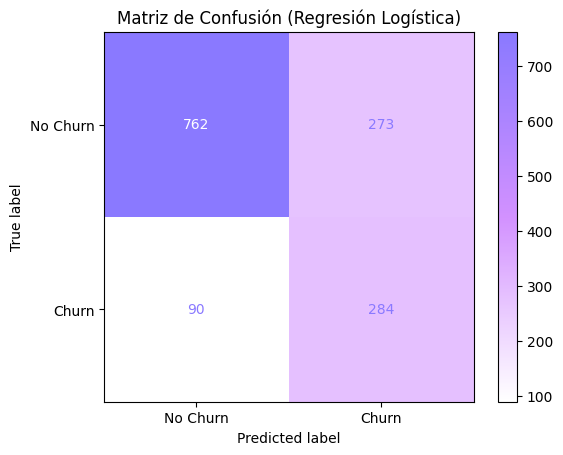

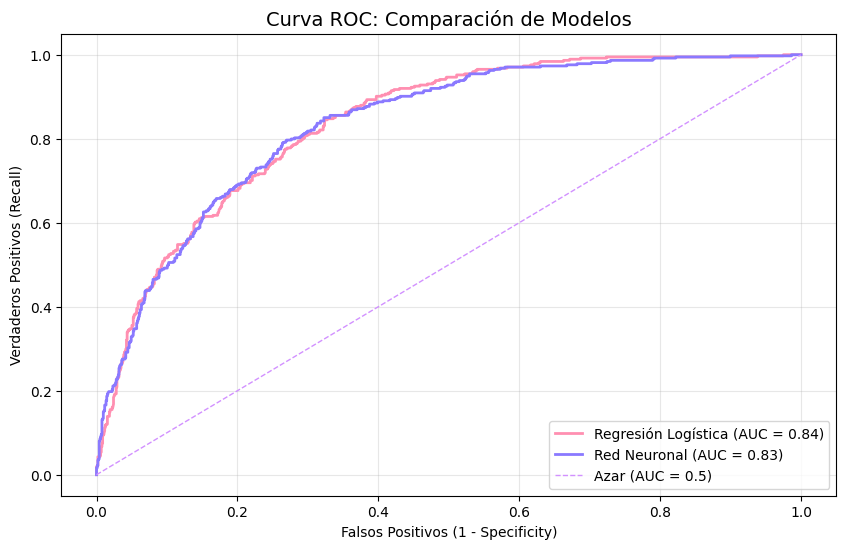

/tmp/ipython-input-2694170080.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefs, palette=palette)
/tmp/ipython-input-2694170080.py:83: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Coefficient', y='Feature', data=coefs, palette=palette)


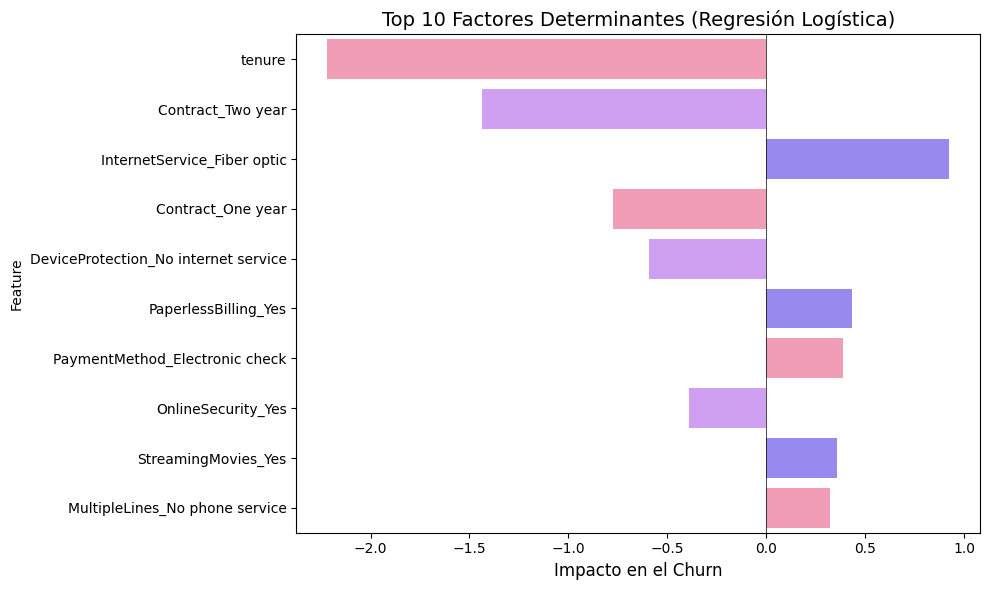

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- 0. DEFINIR TU PALETA ---
# Rosa pastel, Lila, Púrpura vibrante
palette = ["#ff8fb1", "#d291ff", "#8a79ff"]

# Creamos un mapa de color (degradado) para la Matriz de Confusión
# Va desde blanco (para valores bajos) hasta púrpura
custom_cmap = LinearSegmentedColormap.from_list("my_theme", ["#ffffff", palette[1], palette[2]])

# --- 1. PREPARAR EL MEJOR MODELO (Regresión Logística por su AUC alto y simplicidad) ---
# Re-entrenamos rápido para asegurar que tenemos el objeto listo
final_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
final_model.fit(X_train_res, y_train_res)

# Predicciones
y_pred_final = final_model.predict(X_test_processed)
y_pred_prob_final = final_model.predict_proba(X_test_processed)[:, 1]

# --- GRÁFICO 1: MATRIZ DE CONFUSIÓN ---
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=custom_cmap, values_format='d', colorbar=True)
plt.title("Matriz de Confusión (Regresión Logística)")
plt.grid(False)
plt.show()

# --- GRÁFICO 2: CURVA ROC COMPARATIVA ---
# Calculamos curvas
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_final)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Para la Red Neuronal (aprovechando que ya tienes las probs calculadas)
# Asegúrate de que y_pred_prob_nn existe de la celda anterior
if 'y_pred_prob_nn' in locals():
    fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
    roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(10, 6))

plt.plot(fpr_lr, tpr_lr, lw=2, color="#ff8fb1",
         label=f'Regresión Logística (AUC = {roc_auc_lr:.2f})')

if 'y_pred_prob_nn' in locals():
    plt.plot(fpr_nn, tpr_nn, lw=2, color="#8a79ff",
             label=f'Red Neuronal (AUC = {roc_auc_nn:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color="#d291ff",
         label='Azar (AUC = 0.5)')

plt.xlabel('Falsos Positivos (1 - Specificity)')
plt.ylabel('Verdaderos Positivos (Recall)')
plt.title('Curva ROC: Comparación de Modelos', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


# --- GRÁFICO 3: IMPORTANCIA DE VARIABLES (COEFICIENTES) ---
# Recuperar nombres de columnas
try:
    ohe = preprocessor.named_transformers_['cat']['onehot']
    cat_names = ohe.get_feature_names_out(categorical_features)
    feature_names = numeric_features + list(cat_names)

    # Crear DF de coeficientes
    coefs = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': final_model.coef_[0]
    })
    # Ordenar por valor absoluto
    coefs['Abs_Coef'] = coefs['Coefficient'].abs()
    coefs = coefs.sort_values(by='Abs_Coef', ascending=False).head(10)

    plt.figure(figsize=(10, 6))

    # Nueva paleta en tonos rosados
    palette = ["#ff8fb1", "#d291ff", "#8a79ff"]

    sns.barplot(x='Coefficient', y='Feature', data=coefs, palette=palette)
    plt.title("Top 10 Factores Determinantes (Regresión Logística)", fontsize=14)
    plt.xlabel("Impacto en el Churn", fontsize=12)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"No se pudo generar el gráfico de coeficientes: {e}")

7. Interpretación del modelo



Los modelos evaluados presentan desempeños similares, pero la Regresión Logística y la Red Neuronal destacan con los mejores valores de ROC-AUC (≈0.84 y ≈0.83). Ambos priorizan un recall alto para la clase Churn, lo que es clave en este tipo de problemas, ya que permite detectar a la mayoría de los clientes que efectivamente podrían abandonar el servicio, aun cuando eso implique marcar algunos falsos positivos.

La matriz de confusión refleja este enfoque: el modelo identifica bien a los clientes que permanecen, pero también clasifica como “riesgo” a algunos que finalmente no se van. Aun así, detecta la mayor parte de los casos reales de churn, lo que lo hace útil para estrategias preventivas.

En cuanto a los factores que influyen en la predicción, la Regresión Logística muestra que una mayor antigüedad (tenure) y contratos de uno o dos años reducen la probabilidad de churn. En contraste, servicios como fibra óptica, facturación electrónica o ciertos métodos de pago están asociados a mayores tasas de deserción. Esto ayuda a perfilar grupos de clientes más sensibles o con mayor probabilidad de cambiarse

8. Conclusiones y recomendaciones

El modelo desarrollado logra un rendimiento sólido y consistente. Aunque varios algoritmos funcionan bien, la Regresión Logística destaca por su combinación de buen desempeño e interpretabilidad, lo que facilita entender qué factores impulsan el churn.

Los resultados muestran que los clientes nuevos, con contratos mensuales y ciertos servicios digitales, presentan un mayor riesgo de abandonar la compañía. En cambio, aquellos con más antigüedad, contratos de mayor duración y algunos servicios adicionales tienden a mantenerse.

A partir de esto, la empresa podría dirigir esfuerzos de retención hacia los perfiles más riesgosos, ofreciendo renovaciones de contrato, revisando la experiencia de clientes con fibra óptica o incentivando métodos de pago más estables. Si bien el modelo ya entrega información valiosa, podría seguir mejorando mediante nuevas variables, ajustes de umbral o modelos más complejos según las necesidades futuras.